In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [74]:
# Implementing Thompson Sampling
N = 10000
d = 10
adsSelected = []
numberOfRewards1 = [0] * d
numberOfRewards0 = [0] * d
totalReward = 0
for n in range(N):
    ad = 0
    maxRandom = 0
    for i in range(d):
        randomBeta = np.random.beta(numberOfRewards1[i] + 1, numberOfRewards0[i] + 1)
        if randomBeta > maxRandom:
            maxRandom = randomBeta
            ad = i
    adsSelected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numberOfRewards1[ad] += 1
    numberOfRewards0[ad] += 1
    totalReward += reward

In [75]:
print(totalReward)

2515


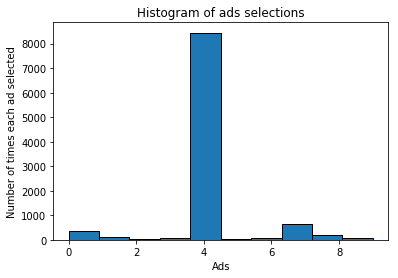

In [76]:
plt.hist(adsSelected, edgecolor = 'black')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad selected')
plt.show()